<a href="https://colab.research.google.com/github/Skiiidoodle/Lung_cancer_image_classification_ver1/blob/main/Lung_cancer_image_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import os

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset",
    seed=42,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 1097 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Bengin cases', 'Malignant cases', 'Normal cases']

In [ ]:
path = "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset"
class_dis = [len(os.listdir(path + f"/{name}")) for name in class_names]
print(f"Class Distribution : \n{class_dis}")

Class Distribution : 
[120, 561, 416]


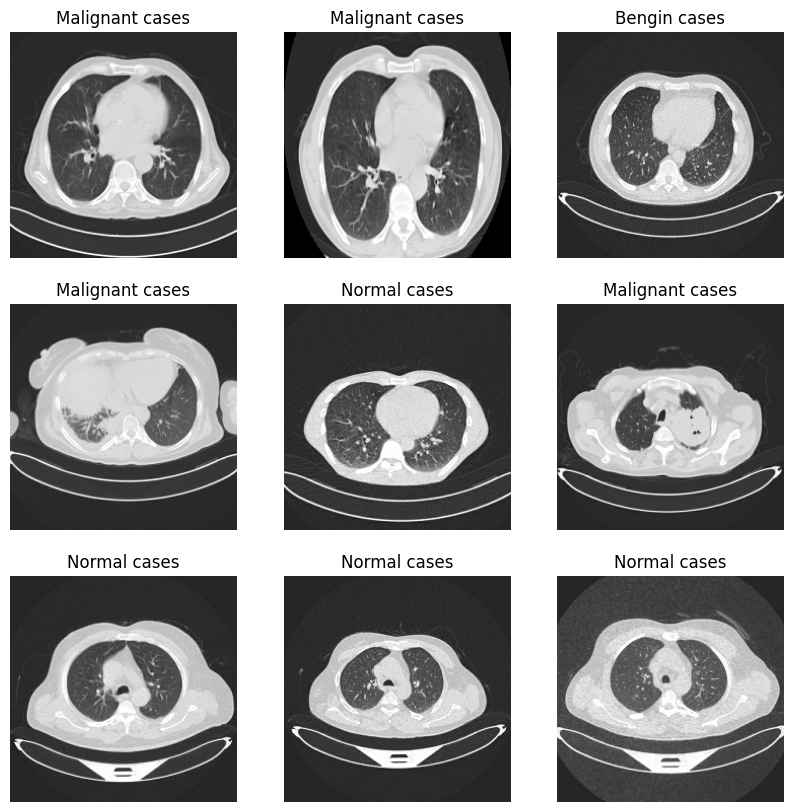

In [ ]:
import matplotlib.pyplot as plt
class_names = dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.pie(names=class_names, values=class_dis, width=600)
fig.update_layout({"title":{'text':"Class Distribution","x":0.5}})
fig.show()

In [ ]:
Lung_df = pd.DataFrame(dataset)

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images = train_test_split(Lung_df, test_size=0.3, random_state=42)

In [ ]:
import os
import cv2
from sklearn.model_selection import train_test_split

# Define the base directory where images are stored
data_dir = "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset"

# Define class labels
classes = ["Bengin cases", "Malignant cases", "Normal cases"]

# Initialize empty lists for images and labels
images = []
labels = []

# Loop through each class directory
for class_name in classes:
    # Get the path to the current class directory
    class_dir = os.path.join(data_dir, class_name)

    # Loop through each image file in the class directory
    for filename in os.listdir(class_dir):
        # Get the full path to the image file
        image_path = os.path.join(class_dir, filename)

        # Load the image using OpenCV or PIL (adjust as needed)
        image = cv2.imread(image_path)  # Replace with your preferred image loading function
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))

        # Append the image and its corresponding label to the lists
        images.append(image)
        labels.append(class_name)

label_dict = {"Bengin cases": 0, "Malignant cases": 1, "Normal cases": 2}
encoded_labels = [label_dict[label] for label in labels]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, random_state=42)

# Convert lists to NumPy arrays for further processing
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# You can now use X_train, X_test, y_train, y_test for your machine learning tasks

print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))


Training data size: 767
Testing data size: 330


In [ ]:
from collections import Counter

# Create a dictionary to store class counts
train_class_counts = Counter()

# Count images for each class
for image_path in y_train:
    #class_name = image_path.split("/")[0]
    class_name = str(image_path).split("/")[0]
    train_class_counts[class_name] += 1

# Print the class counts
print("Number of training images per class:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")


Number of training images per class:
1: 387
2: 300
0: 80


In [ ]:
# Create a dictionary to store class counts
test_class_counts = Counter()

# Count images for each class
for image_path in y_test:
    #class_name = image_path.split("/")[0]
    class_name = str(image_path).split("/")[0]
    test_class_counts[class_name] += 1

# Print the class counts
print("Number of testing images per class:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")

Number of testing images per class:
0: 40
1: 174
2: 116


In [ ]:
label_dict = {"Bengin cases": 0, "Malignant cases": 1, "Normal cases": 0}
train_encoded_labels = np.array([label_dict[label] for label in y_train])
test_encoded_labels = np.array([label_dict[label] for label in y_test])



In [ ]:
# Define a dictionary mapping class labels to numerical values
label_mapping = {"Bengin cases": 0, "Malignant cases": 1, "Normal cases": 2}

# Encode the class labels using the dictionary
train_encoded_labels = np.array([label_mapping[label] for label in y_train]) #encoded to the training set
test_encoded_labels = np.array([label_mapping[label] for label in y_test])  #encoded to the testing set
# Print the encoded labels
print("Encoded class labels using dictionary:", train_encoded_labels)
print(y_train)
print(len(train_encoded_labels))  # Check the length of the newly encoded training set
print(len(test_encoded_labels))  # Check the length of the newly encoded testingg set

Encoded class labels using dictionary: [0 0 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 1 2 2 1 1 2 0 1 1 2 2 0 1 0 1 1 1
 1 1 0 1 1 1 2 1 1 1 2 2 1 2 1 1 1 0 1 0 2 2 2 2 2 1 1 1 1 0 1 1 1 1 1 1 1
 2 1 2 2 1 1 1 2 1 2 1 0 1 1 1 2 1 2 2 2 1 1 1 1 0 2 2 2 1 2 1 2 1 1 1 1 1
 1 2 2 1 2 1 0 0 0 2 1 1 2 1 1 0 0 2 0 1 2 1 2 1 1 1 1 0 1 1 0 0 1 2 1 2 1
 2 1 1 1 1 1 1 1 2 2 1 0 2 1 1 1 1 2 0 1 1 2 1 0 1 1 2 2 1 1 1 2 1 2 1 2 2
 2 2 1 2 1 1 1 1 1 2 0 1 1 2 1 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1
 1 2 1 2 0 1 1 2 2 1 1 0 1 1 2 2 1 1 1 2 2 1 2 2 2 0 1 1 1 1 2 2 1 1 2 2 1
 1 1 1 1 1 1 2 0 2 1 1 1 1 2 1 0 1 1 1 2 1 1 1 2 2 2 1 1 1 2 1 0 2 1 2 1 1
 1 2 1 1 0 2 1 1 2 1 1 2 1 0 0 2 2 2 1 1 0 1 2 1 2 1 2 1 1 1 1 2 1 1 1 0 1
 2 0 1 2 1 2 1 2 2 1 1 2 2 1 1 2 2 1 1 0 2 1 1 0 1 0 2 2 2 2 0 1 2 2 0 1 1
 1 2 1 1 2 2 2 2 1 1 0 2 1 2 1 1 0 1 0 1 2 2 1 2 1 1 2 2 1 2 0 2 0 2 1 2 1
 1 0 2 1 1 1 1 1 1 2 1 0 2 2 1 1 1 2 2 1 0 1 2 0 1 2 0 1 1 1 1 0 1 1 0 2 2
 2 2 1 2 1 2 1 1 2 1 1 1 2 2 1 0 1 2 1 1 1 1 2 1 0 2 2 2 2 1 

In [ ]:
import tensorflow as tf

# Define your labels (list of strings)
labels = classes

# Convert labels to numerical categories (optional, but recommended for some models)
categories = {label: i for i, label in enumerate(labels)}
label_indices = [categories[label] for label in labels]

# One-hot encode the labels
encoded_labels = tf.keras.utils.to_categorical(label_indices, num_classes=len(categories))

# Print the encoded labels
print(encoded_labels)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.fit_transform(y_test.reshape(-1, 1))

In [ ]:
# Using CNN inceptionV4 for image embedding
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
# Load InceptionV3 without the top layer (classification), pre-trained on ImageNet
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers if you only want to fine-tune (optional)
for layer in base_model.layers:
    layer.trainable = False

# Number of classes
num_classes = 3

# Add global average pooling for feature extraction
#x = base_model.output
#x = Dense(1024, activation="relu")(x)
#x = GlobalAveragePooling2D()(x)
#x = Dense(1024, activation="relu")(x)
#x = GlobalAveragePooling2D()(x)
#x = Dense(1024, activation="relu")(x)
#x = GlobalAveragePooling2D()(x)
#x = Dense(1024, activation="relu")(x)
#x = GlobalAveragePooling2D()(x)
#predictions = Dense(num_classes, activation="softmax")(x)

x = base_model.output
# Add new convolutional layer
x = Conv2D(32, (3, 3), activation='relu')(x)
# Add new max pooling layer
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

# Continue with global average pooling, dense layers...
x = GlobalAveragePooling2D()(x)
Dense(1024, activation="relu")(x)

predictions = Dense(num_classes, activation="softmax")(x)

# Add custom layers for your classification task
#x = Dense(1024, activation="relu")(x)  # Replace 1024 and 'relu' with your needs
#predictions = Dense(num_classes, activation="softmax")(x)  # Replace 'num_classes' with your number of classes

# Create the final model using the base and custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Choose an optimizer and loss function suitable for your task
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Data augmentation (optional)
train_datagen = ImageDataGenerator(rescale=1./255., shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [ ]:
# Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // 32,  # Adjust steps_per_epoch based on your dataset size
    validation_steps=len(X_test) // 32,
)

Epoch 1/10
23/23 [==============================] - 128s 5s/step - loss: 3.2208 - accuracy: 0.6340 - val_loss: 30.5920 - val_accuracy: 0.5273
Epoch 2/10
23/23 [==============================] - 118s 5s/step - loss: 0.5081 - accuracy: 0.8177 - val_loss: 52.9002 - val_accuracy: 0.5273
Epoch 3/10
23/23 [==============================] - 119s 5s/step - loss: 0.3769 - accuracy: 0.8680 - val_loss: 29.5805 - val_accuracy: 0.5273
Epoch 4/10
23/23 [==============================] - 120s 5s/step - loss: 0.3533 - accuracy: 0.8571 - val_loss: 36.5695 - val_accuracy: 0.5273
Epoch 5/10
23/23 [==============================] - 119s 5s/step - loss: 0.3210 - accuracy: 0.8723 - val_loss: 41.0072 - val_accuracy: 0.5273
Epoch 6/10
23/23 [==============================] - 120s 5s/step - loss: 0.3099 - accuracy: 0.8707 - val_loss: 32.6148 - val_accuracy: 0.5273
Epoch 7/10
23/23 [==============================] - 126s 5s/step - loss: 0.2775 - accuracy: 0.8762 - val_loss: 29.3734 - val_accuracy: 0.5242
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Save the model for future use
#model.save("my_inceptionv3_model.h5")


7/7 [==============================] - 23s 3s/step - loss: 145.8513 - accuracy: 0.1318
Test accuracy: 0.13181817531585693


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Number of classes in your dataset
num_classes = 3  # Adjust this based on your actual number of classes

# Pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers for fine-tuning
base_model.trainable = False

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    X_train, y_train , batch_size=32)
test_generator = test_datagen.flow(
    X_test, y_test, batch_size=32)

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Evaluate the model (optional)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Epoch 1/10
24/24 [==============================] - 237s 10s/step - loss: 0.9461 - accuracy: 0.4863 - val_loss: 0.9311 - val_accuracy: 0.5182
Epoch 2/10
24/24 [==============================] - 224s 9s/step - loss: 0.9008 - accuracy: 0.5554 - val_loss: 0.9090 - val_accuracy: 0.6212
Epoch 3/10
24/24 [==============================] - 223s 9s/step - loss: 0.8893 - accuracy: 0.5632 - val_loss: 0.8692 - val_accuracy: 0.6455
Epoch 4/10
24/24 [==============================] - 223s 9s/step - loss: 0.8581 - accuracy: 0.6245 - val_loss: 0.8583 - val_accuracy: 0.6333
Epoch 5/10
24/24 [==============================] - 198s 8s/step - loss: 0.8438 - accuracy: 0.6375 - val_loss: 0.8788 - val_accuracy: 0.6061
Epoch 6/10
24/24 [==============================] - 203s 8s/step - loss: 0.8360 - accuracy: 0.6180 - val_loss: 0.8516 - val_accuracy: 0.5970
Epoch 7/10
24/24 [==============================] - 199s 8s/step - loss: 0.8328 - accuracy: 0.6323 - val_loss: 0.9257 - val_accuracy: 0.5727
Epoch 8/10
2